# Midterm Project

### Housing Affordability and Market Trends Across New York City Neighborhoods
Group members: Winnie Yeng, Ameera Alrahmah, Sophie Dang

Driving Questions:

1. Which NY neighborhoods have seen the fastest growth in home prices?
2. How do property characteristics (number of bedrooms, square footage, and building type) influence listing prices?
3. Are there noticeable correlations between proximity to amenities (like subway stations or parks) and property prices?


**1. Which NYC neighborhoods have seen the fastest growth in home prices?**

This question aims to answer which neighborhood in New York City has seen the largest percentage change in home prices from 2000 to 2025.



In [1]:
import pandas as pd
import numpy as np
import requests
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

Let's examine the change in home prices

In [2]:
## import zillow csv file on home values
house_prices = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

In [3]:
## filter out data for New York state only
ny_df = house_prices[house_prices['StateName'] == 'NY'].copy()
display(ny_df)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30
2,270958,2,Upper West Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,418535.681505,...,1.340091e+06,1.357160e+06,1.365931e+06,1.369849e+06,1.366301e+06,1.360424e+06,1.354368e+06,1.350774e+06,1.345560e+06,1.344271e+06
3,270957,3,Upper East Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,681401.623916,...,1.311947e+06,1.328418e+06,1.334783e+06,1.333333e+06,1.323421e+06,1.311963e+06,1.303083e+06,1.300775e+06,1.301281e+06,1.307191e+06
6,194430,6,East New York,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,160891.912386,...,6.585164e+05,6.576684e+05,6.565643e+05,6.554506e+05,6.567804e+05,6.584026e+05,6.603488e+05,6.610995e+05,6.620396e+05,6.639055e+05
7,272902,7,Bedford-Stuyvesant,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,146778.483628,...,1.063725e+06,1.062693e+06,1.060445e+06,1.061580e+06,1.069383e+06,1.081006e+06,1.091874e+06,1.100654e+06,1.109499e+06,1.120547e+06
11,198687,11,Washington Heights,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,206482.346762,...,5.574934e+05,5.636226e+05,5.671535e+05,5.667778e+05,5.640796e+05,5.584116e+05,5.550369e+05,5.536182e+05,5.541847e+05,5.545348e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21085,198180,25825,Stannards,neighborhood,NY,NY,Wellsville,NaN,Allegany County,NaN,...,1.451889e+05,1.459503e+05,1.472025e+05,1.479609e+05,1.485701e+05,1.491487e+05,1.504972e+05,1.523633e+05,1.541551e+05,1.556966e+05
21301,197529,26373,Riverside,neighborhood,NY,NY,Corning,"Corning, NY",Steuben County,NaN,...,1.428516e+05,1.436562e+05,1.438472e+05,1.432023e+05,1.422736e+05,1.408821e+05,1.399353e+05,1.395185e+05,1.396618e+05,1.393784e+05
21318,196548,26426,Napeague,neighborhood,NY,NY,Amagansett,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,...,2.153026e+06,2.134372e+06,2.101627e+06,2.084455e+06,2.075899e+06,2.078354e+06,2.083911e+06,2.088757e+06,2.091641e+06,2.084754e+06
21353,55144,26540,Westhampton Dunes,neighborhood,NY,NY,Westhampton Beach,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,...,3.746907e+06,3.755600e+06,3.769151e+06,3.791656e+06,3.800119e+06,3.779373e+06,3.748868e+06,3.723291e+06,3.708231e+06,3.697493e+06


In [4]:
# Select only the date columns
date_columns = ny_df.columns[ny_df.columns.str.startswith('20')]

# Calculate percentage change
ny_df['price_change_percentage'] = ((ny_df[date_columns.max()] - ny_df[date_columns.min()]) / ny_df[date_columns.min()]) * 100

# Sort to descending order
fastest_growing_neighborhoods = ny_df.sort_values(by='price_change_percentage', ascending=False)

## display and reset index
display(fastest_growing_neighborhoods[['RegionName', 'price_change_percentage']].reset_index(drop=True))

,RegionName,price_change_percentage
0,Red Hook,1087.056435
1,Greenpoint,827.340789
2,Clinton Hill,680.083720
3,Bedford-Stuyvesant,663.427110
4,East Hampton North,616.077057
...,...,...
550,Stannards,NaN
551,Riverside,NaN
552,Napeague,NaN
553,Westhampton Dunes,NaN


What if you have a specific County you want to view home price changes in?

Let's organize the data so that you can see percentage changes organized by County and Regions within that County, sorted by Counties with highest to lowest price change percentages.

In [5]:
## use groupby to group the data by county then region
grouped_data = ny_df.groupby(['CountyName', 'RegionName'])['price_change_percentage'].mean().sort_values(ascending=False)

## display
grouped_data

CountyName          RegionName        
Kings County        Red Hook              1087.056435
                    Greenpoint             827.340789
                    Clinton Hill           680.083720
                    Bedford-Stuyvesant     663.427110
Suffolk County      East Hampton North     616.077057
                                             ...     
Westchester County  Lamartine Heights             NaN
                    McLean Heights                NaN
                    Nodine Hill                   NaN
                    Old 7th Ward                  NaN
                    Radford                       NaN
Name: price_change_percentage, Length: 554, dtype: float64

Let's look at the overall yearly price and price change in NY

In [6]:
## make the function easier to plot by combining columns into one category
ny_data = ny_df.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', 'price_change_percentage'],
    var_name='Date',
    value_name='Price'
)

# Convert 'Date' to datetime objects and extract the year
ny_data['Date'] = pd.to_datetime(ny_data['Date'])
ny_data['Year'] = ny_data['Date'].dt.year

# Calculate the average price and percentage change per year
average_price_per_year = ny_data.groupby('Year')['Price'].mean()
percentage_change_per_year = average_price_per_year.pct_change() * 100

# Combine the two Series into a DataFrame
average_price_and_change = pd.DataFrame({
    'Average Price': average_price_per_year,
    'Yearly % Change': percentage_change_per_year
})

# Display
average_price_and_change



,Average Price,Yearly % Change
Year,,
2000,227211.675284,NaN
2001,256367.076537,12.831824
2002,287229.315942,12.038301
2003,320841.715101,11.702287
2004,355624.259807,10.841029
2005,411913.849061,15.828388
2006,459100.471360,11.455459
2007,454390.275381,-1.025962
2008,440561.270372,-3.043420


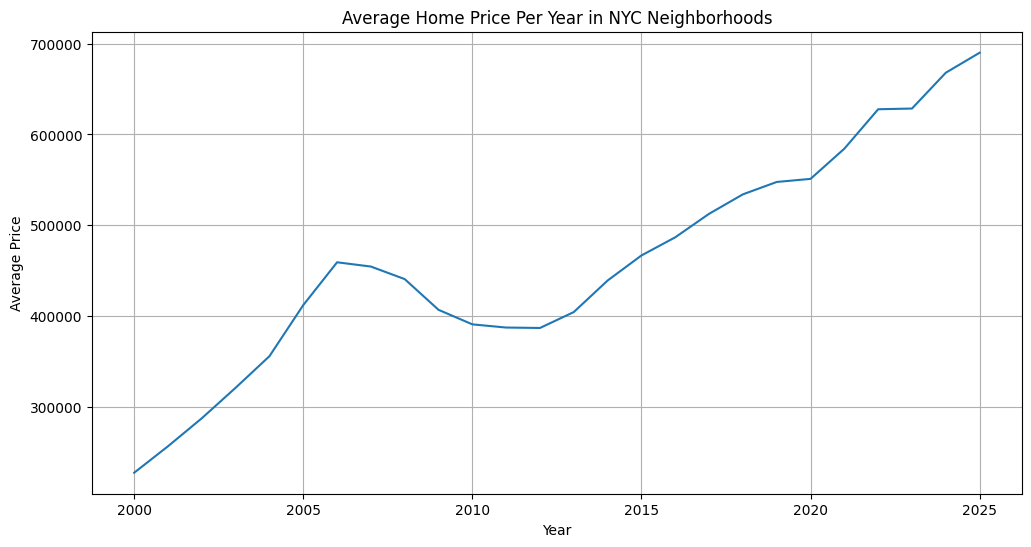

In [7]:
plt.figure(figsize=(12, 6))
## graphs the average price per year
plt.plot(average_price_per_year.index, average_price_per_year.values)
## labeling the graph
plt.title('Average Home Price Per Year in NYC Neighborhoods')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

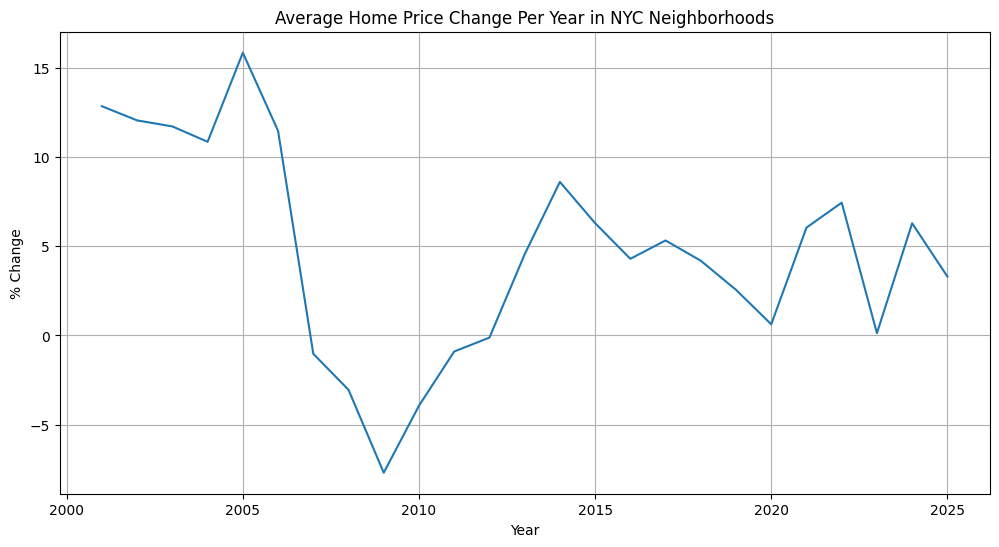

In [8]:
plt.figure(figsize=(12, 6))
## grpahs the percentage change per year
plt.plot(percentage_change_per_year.index, percentage_change_per_year.values)
## adding labels to the graph
plt.title('Average Home Price Change Per Year in NYC Neighborhoods')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.grid(True)
plt.show()

In [9]:
## average percent growth in New York
average_nyc_growth = ny_df['price_change_percentage'].mean()
print(f"Average price growth in New York City: {average_nyc_growth:.2f}%")

Average price growth in New York City: 240.24%


Overall, NYC has seen a 240.24% or approximately 2 times growth in home value from 2000 to 2025, with some neighborhood growing faster than others.

**2. How do property characteristics influence listing prices?**

This question aims to answer what property features of building type, number of residential units, and gross square footage, impact the average sale prices for properties in New York City.

In [10]:
url = 'https://raw.githubusercontent.com/varundixit4/Property-Sales-Analytics/refs/heads/main/NYC_Property_Sales.csv'

In [11]:
df_sales = pd.read_csv(url)

In [12]:
#replace spaces with underscores to minimize errors
df_sales.columns = df_sales.columns.str.replace(' ', '_')

In [13]:
#drop rows with missing data
df_sales = df_sales.dropna(subset=['SALE_PRICE', 'GROSS_SQUARE_FEET', 'BUILDING_CLASS_CATEGORY', 'RESIDENTIAL_UNITS'])

In [14]:
#convert sale prices to numbers
df_sales['SALE_PRICE'] = pd.to_numeric(df_sales['SALE_PRICE'], errors='coerce')
df_sales['GROSS_SQUARE_FEET'] = pd.to_numeric(df_sales['GROSS_SQUARE_FEET'], errors='coerce')
df_sales['RESIDENTIAL_UNITS'] = pd.to_numeric(df_sales['RESIDENTIAL_UNITS'], errors='coerce')

In [15]:
#obtains main buildings types from BUILDING_CLASS_CATEGORY
df_sales['building_type'] = df_sales['BUILDING_CLASS_CATEGORY'].str.split('-').str[0].str.strip()

Let's look at how the number of residential units in a building impacts the average sale price.

Average Sale Price by Number of Residential Units:


,UNITS_GROUP,SALE_PRICE
0,0,7.084117e+06
1,1,2.234968e+06
2,11-49,1.701170e+06
3,2-3,1.149496e+06
4,4-10,1.188605e+06
5,50+,2.848819e+06


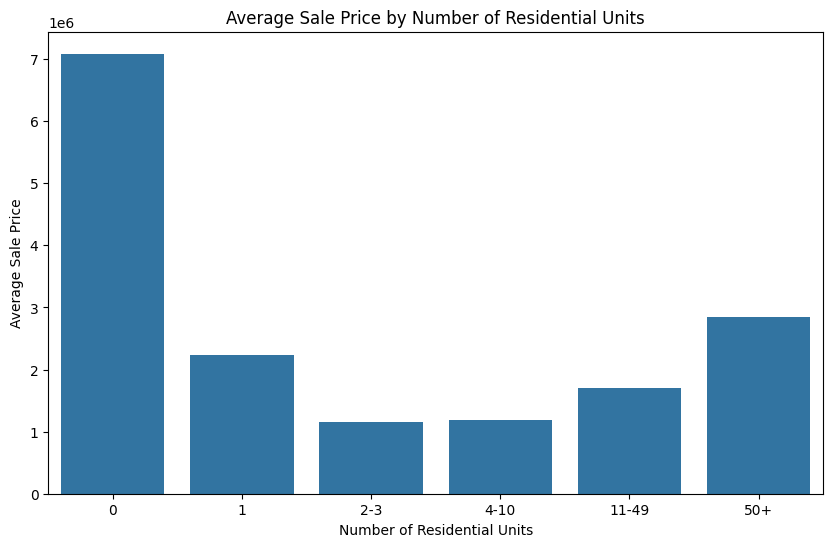

In [16]:
#group into categories: 1 unit, 2-3 units, 4-10 units, 11-49 units, 50+ units
df_sales['UNITS_GROUP'] = df_sales['RESIDENTIAL_UNITS'].apply(
    lambda x: '1' if x == 1 else ('2-3' if 2 <= x <= 3 else ('4-10' if 4 <= x <= 10 else ('11-49' if 11 <= x <= 49 else ('50+' if x >= 50 else '0')))))


#determine average sale price by the grouped units
avg_price_units = (df_sales.groupby('UNITS_GROUP')['SALE_PRICE'].mean().reset_index())

print("Average Sale Price by Number of Residential Units:")
display(avg_price_units)

#sort the order so the bar plot shows correct sequence
category_order = ['0', '1', '2-3', '4-10', '11-49', '50+']
avg_price_units['UNITS_GROUP'] = pd.Categorical(
    avg_price_units['UNITS_GROUP'],
    categories=category_order,
    ordered=True)

#plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='UNITS_GROUP', y='SALE_PRICE', data=avg_price_units)
plt.xlabel('Number of Residential Units')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Number of Residential Units')
plt.show();

The bar graph above shows that buildings with 0 residential units have the highest average sale price, followed by buildings with 50+ residential units. Buildings with 4-10 residential units have the lowest average sale price.

Let's look at how the gross square feet of a building impacts the average sale price in a sampled graph.

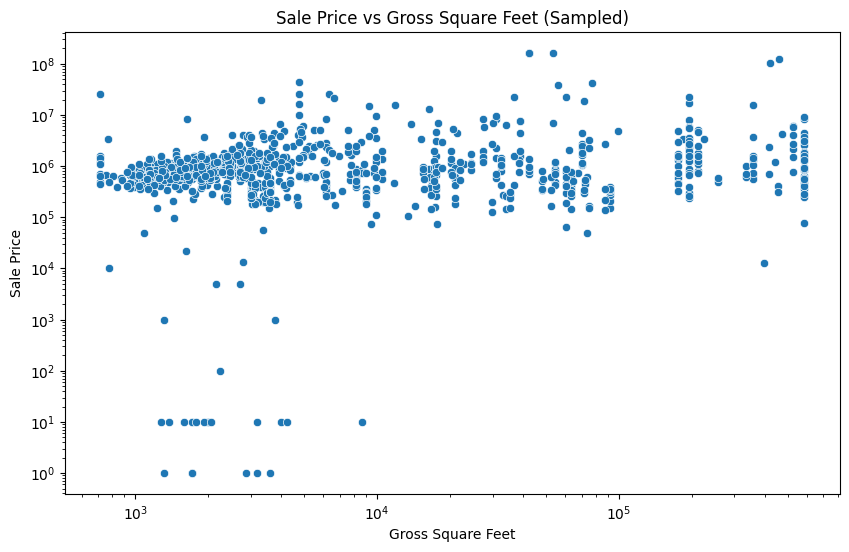

In [17]:
#sample 1000 rows from the dataset
df_sampled = df_sales.sample(n = 1000, random_state = 42)

#plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GROSS_SQUARE_FEET', y='SALE_PRICE', data=df_sampled)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Gross Square Feet (Sampled)')
plt.show()

According to the results, most data points were relatively similar despite varying in gross square footage. While some data points represent a positive relationship between the two variables, as they show that buildings with a smaller gross square footage have a lower average sale price, the rest of the data do not show a clear relationship between a building's gross square footage and sale price.

Let's look at how the type of NYC building impacts the average sale price.

Average Sale Price by Building Type:


,building_type,SALE_PRICE
0,01 ONE FAMILY DWELLINGS,9.067086e+05
1,02 TWO FAMILY DWELLINGS,1.066741e+06
2,03 THREE FAMILY DWELLINGS,1.353914e+06
3,04 TAX CLASS 1 CONDOS,7.051044e+05
4,05 TAX CLASS 1 VACANT LAND,1.278229e+06


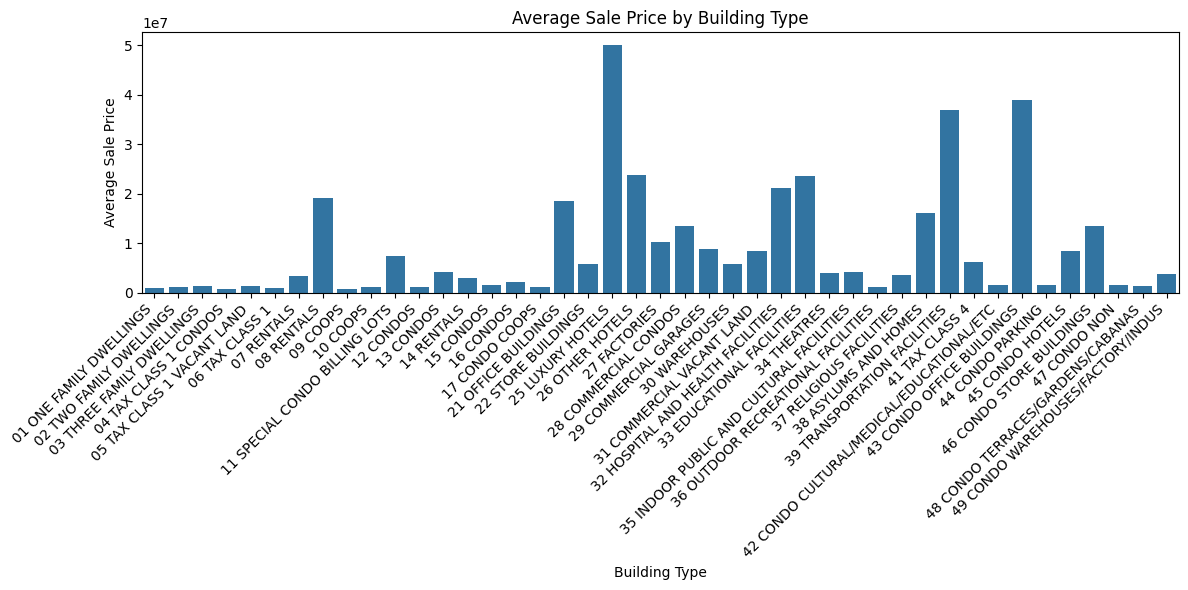

In [18]:
#calculate the average sale price for each building type
avg_price_by_building_type = df_sales.groupby('building_type')['SALE_PRICE'].mean().reset_index()

print("Average Sale Price by Building Type:")
display(avg_price_by_building_type.head())

#plot a bar graph of the average sale price by building type
plt.figure(figsize=(12, 6))
sns.barplot(x='building_type', y='SALE_PRICE', data=avg_price_by_building_type)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Building Type')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Building Type')
plt.tight_layout()
plt.show()

The bar graph shows that the average sale price is greatest for luxury hotels and second greatest for condo office buildings and transportation facilities. However, because there are so many building types, this graph is difficult to read, especially for examining which building type has the least greatest average sale price.

Let's look at this data more closely when building type is grouped into broader categories.

Average Sale Price by Building Type:


,building_type_category,SALE_PRICE
0,Commercial/Other,9.676040e+06
1,Condo,7.317181e+06
2,Residential,1.900211e+06


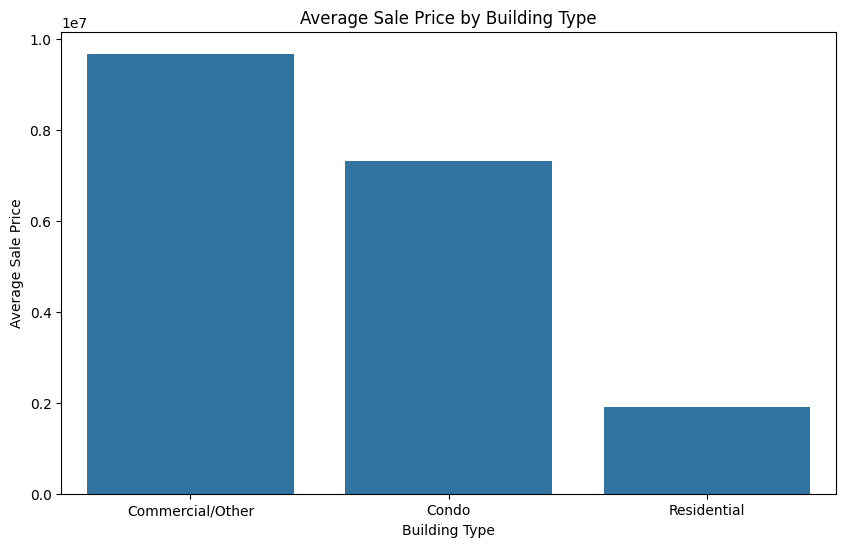

In [19]:
#group buildings by broad categories
def categorize_building_type(building_type):
    if building_type.startswith(('01', '02', '03', '04', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17')):
        return 'Residential'
    elif building_type.startswith(('21', '22', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38')):
        return 'Commercial/Other'
    elif building_type.startswith(('41', '42', '43', '44', '45', '46', '47', '48', '49')):
        return 'Condo'

df_sales['building_type_category'] = df_sales['building_type'].apply(categorize_building_type)

#calculate the average sale price for each building type
avg_price_building_category = df_sales.groupby('building_type_category')['SALE_PRICE'].mean().reset_index()

print("Average Sale Price by Building Type:")
display(avg_price_building_category)

#plot a bar graph of average sale price by building type
plt.figure(figsize=(10, 6))
sns.barplot(x='building_type_category', y='SALE_PRICE', data=avg_price_building_category)
plt.xlabel('Building Type')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Building Type')
plt.show();

This graph better presents the results that the average sale price is greatest for commercial buildings and lowest for residential buildings. Similar to buildings with 0 residential units, we can attribute this difference in cost to these buildings being primarily designed for businesses, which require other finishing standards than those of condo and residential buildings.

Let's look at how all these variables together impact a building's sale price.

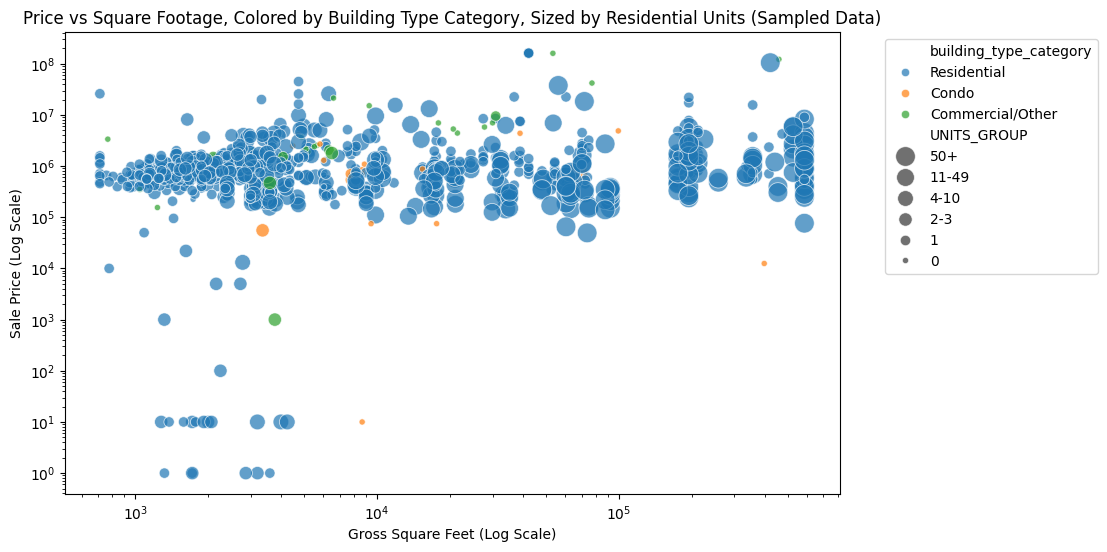

In [20]:
#sample the data to reduce the number of points
df_sales_filtered_sampled = df_sales.sample(n = 1000, random_state=42)

#sort the order for the categories
category_order = ['50+', '11-49', '4-10', '2-3', '1', '0']
#add size order
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GROSS_SQUARE_FEET', y='SALE_PRICE', hue='building_type_category', size='UNITS_GROUP',
                data=df_sales_filtered_sampled, sizes=(20, 200), alpha=0.7, size_order=category_order)

#plot the results
plt.title("Price vs Square Footage, Colored by Building Type Category, Sized by Residential Units (Sampled Data)")
plt.xlabel("Gross Square Feet (Log Scale)")
plt.ylabel("Sale Price (Log Scale)")
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

The scatterplot shows that residential buildings with 0 residential units and smaller gross square footage are similarly priced with residential buildings with 50+ residential units and greater gross square footage. It also shows a positive relationship between the building's gross square footage and number of residential units, with the buildings with 0 residential units having a lower gross square footage and buildings with 50+ residential units having a greater gross square footage.

**3. Are there noticeable correlations between proximity to amenities (like subway stations or parks) and property prices in NYC?**


This question will be answered in three parts:

1. Correlation between proximity to subway stations and property prices
2. Correlation between proximity to parks and property prices
3. Difference in property prices based on the type of nearby parks (waterfront vs. non-waterfront)

By analyzing these three aspects, we aim to understand how the proximity to different amenities affect property prices in NYC.

**1. Correlation between proximity to subway stations and property prices**

We will start by loading the data sets required to answer the first part of the question (one for the property prices and another for the subway locations).

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# load NYC property sales data
property_url = "https://data.cityofnewyork.us/resource/w2pb-icbu.csv"
nyc_sales = pd.read_csv(property_url)

# take a random sample of 500
sample_500 = nyc_sales.sample(n=500, random_state=42).copy()
sample_500.head()

,borough,neighborhood,building_class_category,tax_class_as_of_final_roll,block,lot,ease_ment,building_class_as_of_final,address,apartment_number,...,sale_price,sale_date,latitude,longitude,community_board,council_district,bin,bbl,census_tract_2020,nta
521,5,CASTLETON CORNERS,01 ONE FAMILY DWELLINGS,1,346,366,NaN,A0,87 GOVERNOR ROAD,NaN,...,445000,2016-01-05T00:00:00.000,40.615456,-74.121358,501.0,50.0,5009424.0,5.003460e+09,147.0,SI0105
737,4,BAYSIDE,10 COOPS - ELEVATOR APARTMENTS,2,5938,7,NaN,D4,"18-15 215TH STREET, 10A",NaN,...,700000,2016-01-06T00:00:00.000,40.783752,-73.776303,407.0,19.0,4454676.0,4.059380e+09,99703.0,QN0703
740,4,BRIARWOOD,10 COOPS - ELEVATOR APARTMENTS,2,9665,1,NaN,D4,"83-20 141ST STREET, 4E",NaN,...,245000,2016-01-06T00:00:00.000,40.712633,-73.818554,408.0,24.0,4453850.0,4.096650e+09,22001.0,QN0805
660,3,BOROUGH PARK,02 TWO FAMILY DWELLINGS,1,5638,54,NaN,B1,955 50 STREET,NaN,...,1300000,2016-01-06T00:00:00.000,40.639079,-74.000321,312.0,38.0,3137583.0,3.056380e+09,114.0,BK1201
411,3,MANHATTAN BEACH,01 ONE FAMILY DWELLINGS,1,8753,39,NaN,A1,114 KENSINGTON STREET,NaN,...,1650000,2016-01-05T00:00:00.000,40.580147,-73.942048,315.0,48.0,3000000.0,3.087530e+09,620.0,BK1503


In [23]:
# load subway station data
subway_url = "https://data.ny.gov/resource/39hk-dx4f.csv"
subway = pd.read_csv(subway_url)

subway.head()

,gtfs_stop_id,station_id,complex_id,division,line,stop_name,borough,cbd,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,ada,ada_northbound,ada_southbound,ada_notes,georeference
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,N W,Elevated,40.775036,-73.912034,Last Stop,Manhattan,0,0,0,NaN,POINT (-73.912034 40.775036)
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,N W,Elevated,40.770258,-73.917843,Astoria,Manhattan,1,1,1,NaN,POINT (-73.917843 40.770258)
2,R04,3,3,BMT,Astoria,30 Av,Q,False,N W,Elevated,40.766779,-73.921479,Astoria,Manhattan,0,0,0,NaN,POINT (-73.921479 40.766779)
3,R05,4,4,BMT,Astoria,Broadway,Q,False,N W,Elevated,40.761820,-73.925508,Astoria,Manhattan,0,0,0,NaN,POINT (-73.925508 40.76182)
4,R06,5,5,BMT,Astoria,36 Av,Q,False,N W,Elevated,40.756804,-73.929575,Astoria,Manhattan,0,0,0,NaN,POINT (-73.929575 40.756804)


After loading the data sources, we now have to calculate the distance between the properties and the subway stations. To do this, we will be using geopy distance.

In [ ]:
from geopy.distance import geodesic

# function to find the nearest subway station to a given property
def find_nearest_subway(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return None # in case data is missing

   # calculate distances
    property_coords = (lat, lon)
    distances = [geodesic(property_coords, (s['gtfs_latitude'], s['gtfs_longitude'])).miles
                 for _, s in subway.iterrows()]
    return min(distances) # return the minimum distance (nearest subway)

# stores the nearest subway distance in a new column
sample_500['distance_to_subway_miles'] = sample_500.apply(
    lambda row: find_nearest_subway(row['latitude'], row['longitude']), axis=1)

Now that we calculated the distances to the nearest subway station, we can find the correlation coefficient between the property price and the distance to the nearest subway station.

In [ ]:
# find the coefficient between property price and distance to subway
# filter out properties with $0 sale price
valid_sales = sample_500[sample_500['sale_price'] > 0]
correlation = valid_sales['sale_price'].corr(valid_sales['distance_to_subway_miles'])

print(f"correlation between price and subway distance: {correlation:.3f}")
print(f"properties analyzed: {len(valid_sales)}")

The correlation coefficient is -0.047, which means that there is a very weak negative relationship between property prices and distance to subway station. In other words, as the distance to subway stations increase, property prices slightly decrease.

Let's plot a graph to futhur understand the relationship between property price and distance to subway.

In [ ]:
# create a regression plot to show the relationship between property price and distance to subway
plt.figure(figsize=(10, 6))
sns.regplot(
    x='distance_to_subway_miles',
    y='sale_price',
    data=valid_sales,
    scatter_kws={'alpha': 0.6, 's': 50},
    line_kws={'color': 'red', 'linestyle': '--'}
)

# limit y-axis to remove effect of extreme outlier
plt.ylim(0, 5_000_000)

# label the regression plot
plt.xlabel('Distance to Nearest Subway (miles)')
plt.ylabel('Sale Price ($)')
plt.title(f'Property Prices vs. Distance to Subway\nCorrelation: {correlation:.3f}')
plt.grid(True, alpha=0.3)
plt.show()

Many property prices cluster below $1m regardless of distance to the subway, and majority of properties are close by a subway (within 1 mile). Overall, there is a very weak negative relationship between distance and sale price, as shown by the slightly downward-sloping red regression line. The effect of subway proximity on price appears minimal in this dataset.

**2. Correlation between proximity to parks and property prices**

For the second part of the question, we will apply the same concept to find the correlation (replacing subway data with the park data).

In [ ]:
# load parks data
import geopandas as gpd

url = "https://data.cityofnewyork.us/resource/enfh-gkve.geojson"
parks = gpd.read_file(url)

# extract lat/lon with geopandas since they're not in the original dataset
parks["latitude"] = parks.geometry.centroid.y
parks["longitude"] = parks.geometry.centroid.x

parks.head()

In [ ]:
from geopy.distance import geodesic

# function to find the nearest park to a given property
def find_nearest_park(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return None # in case data is missing

   # calculate distances
    property_coords = (lat, lon)
    distances = [geodesic(property_coords, (p['latitude'], p['longitude'])).miles
                 for _, p in parks.iterrows()]
    return min(distances) # return the minimum distance (nearest park)

# stores the nearest park distance in a new column
sample_500['distance_to_park_miles'] = sample_500.apply(
    lambda row: find_nearest_park(row['latitude'], row['longitude']), axis=1)

In [ ]:
# find the coefficient between property price and distance to parks
# filter out properties with $0 sale price
valid_sales = sample_500[sample_500['sale_price'] > 0]
correlation2 = valid_sales['sale_price'].corr(valid_sales['distance_to_park_miles'])
print(f"correlation between price and park distance: {correlation2:.3f}")
print(f"properties analyzed: {len(valid_sales)}")

The correlation between proximity to parks and property prices is -0.058, which is very similar to that of subway stations (though proximity to parks shows a slightly stronger relationship).

In [ ]:
# create a regression plot to show the relationship between property price and distance to parks
plt.figure(figsize=(10, 6))
sns.regplot(
    x='distance_to_park_miles',
    y='sale_price',
    data=valid_sales,
    scatter_kws={'alpha': 0.6, 's': 50},
    line_kws={'color': 'red', 'linestyle': '--'}
)

# limit y-axis to remove effect of extreme outlier
plt.ylim(0, 5_000_000)

# label the regression plot
plt.xlabel('Distance to Nearest Park (miles)')
plt.ylabel('Sale Price ($)')
plt.title(f'Property Prices vs. Distance to Park\nCorrelation: {correlation2:.3f}')
plt.grid(True, alpha=0.3)
plt.show()

Based on the graph, there is a very weak negative relationship between property prices and the distance to the nearest park similar to the subway graph. Most properties are clustered within 0.6 miles of a park, showing that many are located close to a park. The red regression line shows a slight downward trend, indicating that as the distance to a park is farther, the sale price slightly decreases.

**3. Difference in property prices based on the type of nearby parks (waterfront vs. non-waterfront)**

To answer this, we will split the data into 3 categories: properties near a waterfront park, properties near a non-waterfront park, and properties that are not near a park. Then, we will find the average property price of each category and see if there is any notable differences.

In [ ]:
# split the dataset into waterfront and non-waterfront parks
waterfront_parks = parks[parks['waterfront'] == True].copy()
non_waterfront_parks = parks[parks['waterfront'] == False].copy()

# count how many are in each group
print(f"Number of waterfront parks: {len(waterfront_parks)}")
print(f"Number of non-waterfront parks: {len(non_waterfront_parks)}")

Note that there are many more non-waterfront parks than waterfront parks in the data, which may cause greater variability in the results.

In [ ]:
# calculate distances to nearest waterfront park
def find_nearest_waterfront_park(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return None

    property_coords = (lat, lon)
    distances = [geodesic(property_coords, (p['latitude'], p['longitude'])).miles
                 for _, p in waterfront_parks.iterrows()]
    return min(distances)

sample_500['distance_to_nearest_waterfront_park_miles'] = sample_500.apply(
    lambda row: find_nearest_waterfront_park(row['latitude'], row['longitude']), axis=1)

In [ ]:
# calculate distances to nearest non-waterfront park

def find_nearest_non_waterfront_park(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return None

    property_coords = (lat, lon)
    distances = [geodesic(property_coords, (p['latitude'], p['longitude'])).miles
                 for _, p in non_waterfront_parks.iterrows()]
    return min(distances)

sample_500['distance_to_nearest_non_waterfront_park_miles'] = sample_500.apply(
    lambda row: find_nearest_non_waterfront_park(row['latitude'], row['longitude']), axis=1)

After calculating the distances, we need to set a threshold to group the data into properties near a waterfront park, near a non-waterfront park, or not near a park.

We’ll use a 0.5-mile threshold, meaning any property without a park within 0.5 miles will be classified as “not near a park.” If a property is close to both a waterfront and a non-waterfront park, the function will categorize it based on whichever park is closer.

In [ ]:
# determine if the nearest park is waterfront, non-waterfront, or not near a park
def categorize_nearest_park(row):
    min_distance_waterfront = row['distance_to_nearest_waterfront_park_miles']
    min_distance_non_waterfront = row['distance_to_nearest_non_waterfront_park_miles']

    # define a threshold for "not near park"
    not_near_threshold = 0.5  # in miles

    if pd.isna(min_distance_waterfront) and pd.isna(min_distance_non_waterfront):
        return 'Not Near Park' # handle cases where both distances are missing

    if min_distance_waterfront > not_near_threshold and min_distance_non_waterfront > not_near_threshold:
        return 'Not Near Park'
    elif min_distance_waterfront <= min_distance_non_waterfront:
        return 'Waterfront'
    else:
        return 'Non-Waterfront'

sample_500['nearest_park_type'] = sample_500.apply(categorize_nearest_park, axis=1)

# filter out properties with $0 sale price after adding the nearest_park_type column
valid_sales = sample_500[sample_500['sale_price'] > 0].copy()

In [ ]:
# find the average property prices of each category
average_prices_by_park_type = valid_sales.groupby('nearest_park_type')['sale_price'].mean()
print(average_prices_by_park_type)

The data shows a very significant difference between the property prices, with homes near a park- especially non-waterfront ones- being far more expensive than those not near a park.

In [ ]:
# create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices_by_park_type.index, y=average_prices_by_park_type.values)
plt.xlabel('Nearest Park Type')
plt.ylabel('Average Sale Price ($)')
plt.title('Average Sale Price by Nearest Park Type')
plt.show()

Properties near a park sell for much higher prices, with non-waterfront homes being the most expensive (about twice as much expensive as the waterfront ones). Homes not near a park have the lowest prices by far. This shows that being close to a park, and the kind of park nearby, has a strong effect on property values in NYC.